In [24]:
from nilearn import plotting as niplt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as mplcolors
import pickle
import itertools
import glob
from collections import OrderedDict
import nibabel as nib
import matplotlib as ml

%load_ext autoreload
%autoreload 1
%aimport base.plotting

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from base.classifiers import OnevsallClassifier, PairwiseClassifier
from neurosynth.base.dataset import Dataset
dataset = Dataset.load("../data/datasets/abs_60topics_filt_jul.pkl")

In [26]:
sns.set_context('talk')

## Clustering solutions and silhouette score

In [27]:
silhouette = [pickle.load(open(f, 'r')) for f in ['../results/clustering/results/LFC/kmeansclust_k_15_id.pkl', '../results/clustering/results/LFC/kmeansclust_k_20_25_id.pkl', '../results/clustering/results/LFC/kmeansclust_k_26_31_id.pkl']]

In [28]:
# Flatten list
silhouette = list(itertools.chain(*silhouette))

In [29]:
len(silhouette)

29

In [30]:
silhouette = pd.DataFrame(zip(range(2, len(silhouette) + 2), silhouette), columns=['k', 'silhouette'])

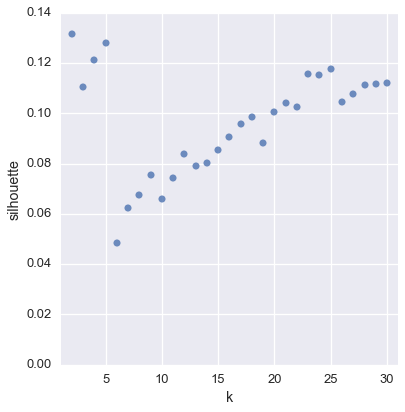

In [31]:
p = sns.lmplot('k', 'silhouette', silhouette, size=6, fit_reg=False,  scatter_kws={"s": 50})
plt.xlim(1, 31)
plt.ylim(0, 0.14)
fig = plt.gcf()

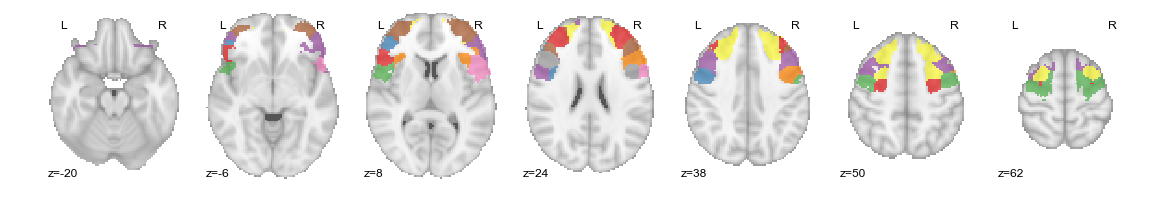

In [32]:
niplt.plot_roi('../results/clustering/results/LFC/kmeans_k23/cluster_labels.nii.gz',
               display_mode='z',
               cmap = mplcolors.ListedColormap(sns.color_palette('Set1', 23)),)

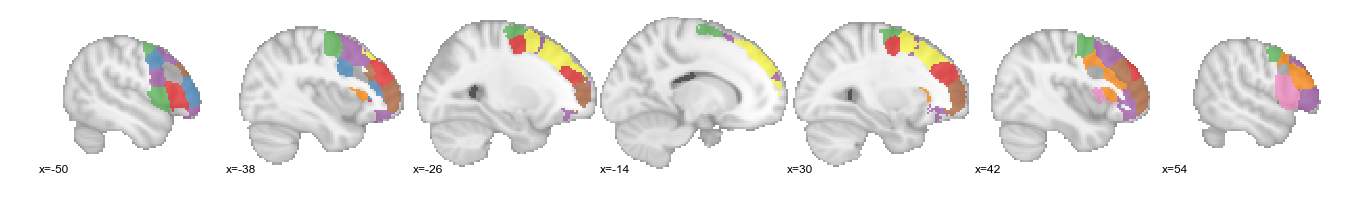

In [33]:
niplt.plot_roi('../results/clustering/results/LFC/kmeans_k23/cluster_labels.nii.gz',
               display_mode='x',
               cmap = mplcolors.ListedColormap(sns.color_palette('Set1', 23)),)

In [34]:
# from neurosynth import imageutils
# for f in glob.glob('../results/clustering/results/LFC/agglomerative_k*/cluster*.nii.gz'):
#     d = imageutils.load_imgs(f, dataset.masker)
#     imageutils.save_img(d, f, dataset.masker)

In [35]:
def plot_subset(nifti, layers, colors = None,  **kwargs):    
    nibs = nib.load(nifti)
    data = nibs.get_data()

    vmax = int(np.round(data.max()))
    
    for value in np.unique(np.round(data)):
        if np.in1d(value, layers)[0] == False:
            data[np.round(data) == value] = 0

    for i, value in enumerate(layers):
        data[np.round(data) == value] = i + 1

    niplt.plot_roi(nibs, cmap = mplcolors.ListedColormap(colors), draw_cross=False, **kwargs)

### Cluster labels

#### 23 regions - 10-13 potential cognitive control regions
- Motor - 12 (R), 2 (L)
- IFJ - Region 18 (R) and 11 (L). In left there's a ventral IFJ/ IFG opercularis (13). (Marsel Brass - 48, 4, 33).
- bilateral DLPFC - 4 (post), 16 (mid)
- IFS - 5 (R), 9 (L)
- IFG - 17 (R), 21 (L)
- bilateral rostral LPFC 19; lFP - 7
- bil superior frontal junction - 6

In [36]:
regions = [('bSPreMotor', 12), ('lMotor', 2), ('lIFJ', 11), ('rIFJ', 18), ('lvIFJ', 13), ('pDLPFC', 4), ('midDLPFC', 16),
           ('rIFS', 5), ('lIFS', 9), ('rIFGo', 17), ('lIFGo', 21), ('rosLPFC', 19), ('LFP', 7), ('SFJ', 6), ('lIFG', 1),
          ('pSFG' , 3), ('IPrCS', 8), ('sPrCS', 10),  ('FOC', 14), ('pSFS', 15), 
           ('lrosVLPFC', 20), ('lFP', 22), ('rMotor', 23)]
regions = OrderedDict(sorted(regions, key=lambda tup: tup[1]))


coreB = ['pDLPFC', 'midDLPFC']
coreL = ['lIFJ', 'lIFGo', 'lIFS', 'lIFG', ]
coreR = ['rIFJ', 'rIFS', 'rIFG', 'rIFGo']
other = ['lvIFJ', 'lMotor', 'rMotor']

IFJ_m = ['rIFJ', 'lIFJ']
IFG_h = ['rIFG', 'lIFG']


import random
coreAll = coreB + coreL + coreR
core_regionsAll = OrderedDict([(k, v) for (k,v) in regions.iteritems() if k in coreAll])
core_colors = sns.color_palette('hls', len(core_regionsAll.values()))


In [37]:
random.shuffle(core_colors)

In [38]:
regions

OrderedDict([('lIFG', 1), ('lMotor', 2), ('pSFG', 3), ('pDLPFC', 4), ('rIFS', 5), ('SFJ', 6), ('LFP', 7), ('IPrCS', 8), ('lIFS', 9), ('sPrCS', 10), ('lIFJ', 11), ('bSPreMotor', 12), ('lvIFJ', 13), ('FOC', 14), ('pSFS', 15), ('midDLPFC', 16), ('rIFGo', 17), ('rIFJ', 18), ('rosLPFC', 19), ('lrosVLPFC', 20), ('lIFGo', 21), ('lFP', 22), ('rMotor', 23)])

['lIFG', 'pDLPFC', 'rIFS', 'lIFS', 'lIFJ', 'midDLPFC', 'rIFGo', 'rIFJ', 'lIFGo']


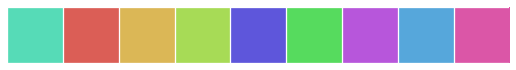

In [39]:
print core_regionsAll.keys()
sns.palplot(core_colors)

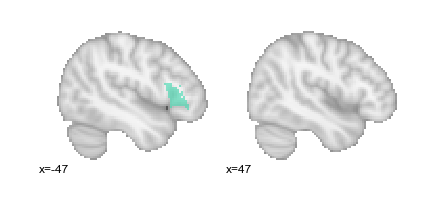

In [40]:
colors, mask = zip(*[(core_colors[i], v) for i, (k, v) in enumerate(core_regionsAll.iteritems()) if k in IFG_h])

plot_subset('../results/clustering/results/LFC/kmeans_k23/cluster_labels.nii.gz', mask, colors=colors, 
            display_mode='x', cut_coords=[-47, 47])


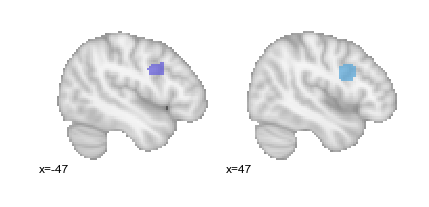

In [41]:
colors, mask = zip(*[(core_colors[i], v) for i, (k, v) in enumerate(core_regionsAll.iteritems()) if k in IFJ_m])

plot_subset('../results/clustering/results/LFC/kmeans_k23/cluster_labels.nii.gz', mask, colors=colors, 
            display_mode='x', cut_coords=[-47, 47])


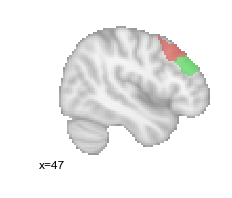

In [42]:
colors, mask = zip(*[(core_colors[i], v) for i, (k, v) in enumerate(core_regionsAll.iteritems()) if k in coreB])

plot_subset('../results/clustering/results/LFC/kmeans_k23/cluster_labels.nii.gz', mask, colors=colors, display_mode='x', cut_coords=[47])
# plt.savefig('../reports/LFC_diss/core_LPFC_r.png')

IOError: [Errno 2] No such file or directory: '../reports/LFC_diss/core_LPFC_r.png'

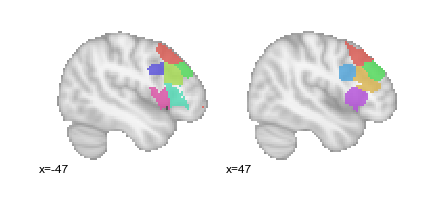

In [43]:
colors, mask = zip(*[(core_colors[i], v) for i, (k, v) in enumerate(core_regionsAll.iteritems()) if k in coreAll])

plot_subset('../results/clustering/results/LFC/kmeans_k23/cluster_labels.nii.gz', mask, colors=colors, display_mode='x', cut_coords=[-47, 47], alpha=.85)
plt.savefig('../reports/LFC_diss/core_LPFC_r.png')

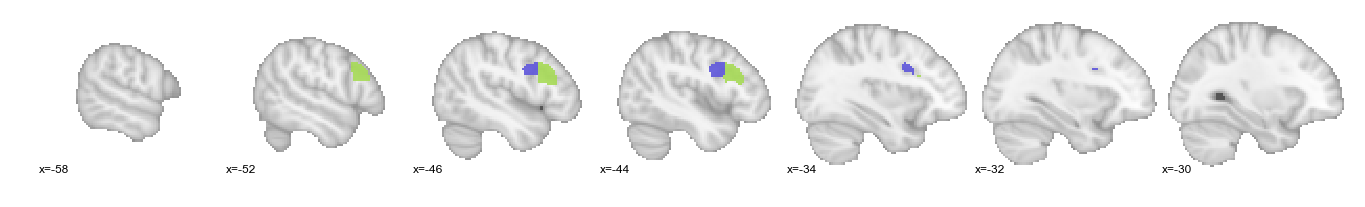

In [95]:
colors, mask = zip(*[(core_colors[i], v) for i, (k, v) in enumerate(core_regionsAll.iteritems()) if k in ['lIFJ', 'lIFS']])

plot_subset('../results/clustering/results/LFC/kmeans_k23/cluster_labels.nii.gz', mask, colors=colors, display_mode='x', alpha=0.9)
plt.savefig('../reports/dissertation//nearLeftIFJ.png')

## LPFC

## Classification Performance

In [49]:
clfs = [OnevsallClassifier.load(clf + "/classifier.pkl") for clf in glob.glob("../results/classification/LFC*OvA*Ridge*")]

In [50]:
all_scores = []
for clf in clfs:
    for n, score in enumerate(clf.class_score):
        all_scores.append([clf.mask_num, n + 1, clf.n_features_orig, 'clf' , score])
all_scores = pd.DataFrame(all_scores, columns=['n_regions', 'region', 'n_topics', 'clf', 'score'])

(0.5, 0.676)

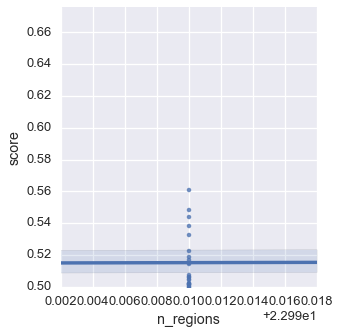

In [51]:
sns.lmplot('n_regions', 'score',  all_scores)
plt.ylim(0.5, 0.676)

## Functional specialization

### Preprocessing

In [52]:
num_regions = 23
n_topics = 60
clf = [clf for clf in clfs if (clf.mask_num == num_regions) & (clf.n_features_orig == n_topics)][0]

In [53]:
def get_fis_melt(clf, n_topics, key='nickname'):
    ## Set up topic nicknames
    word_keys = pd.read_csv("../data/unprocessed/abstract_topics_filtered/topic_sets/topic_keys" + str(n_topics) + "-july_cognitive.csv")
    word_keys['topic_name'] = "topic" + word_keys['topic'].astype('str')

    o_fi = pd.DataFrame(clf.feature_importances)

    # Melt feature importances, and add top_words for each feeature
    o_fi['region'] = range(1, o_fi.shape[0] + 1)
    o_fis_melt = pd.melt(o_fi, var_name='topic_order', value_name='importance', id_vars=['region'])

    word_keys = pd.merge(pd.DataFrame(np.array([range(0, clf.feature_importances.shape[1]), clf.feature_names]).T, columns=['topic_order', 'topic_name']), word_keys)
    word_keys.topic_order = word_keys.topic_order.astype('int')

    o_fis_melt= pd.merge(o_fis_melt, word_keys)

    return o_fis_melt

In [107]:
o_fis_melt = get_fis_melt(clf, 60)

In [108]:
o_fis_melt['region_name'] = o_fis_melt.region.map({v: k for k, v in regions.items()})

In [56]:
from sklearn.metrics import pairwise_distances
fi_dist = pairwise_distances(clf.feature_importances, metric='correlation')

In [57]:
fi_dist = pd.DataFrame(fi_dist, columns=regions.keys(), index=regions.keys())

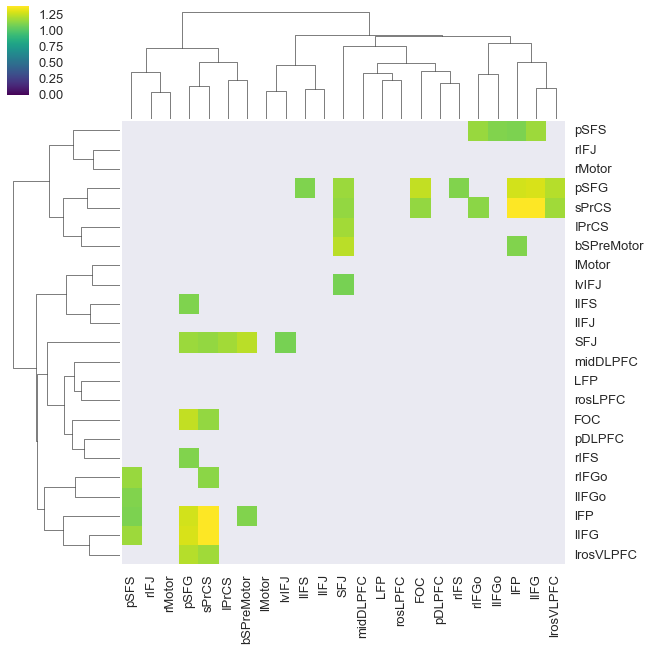

In [58]:
plt.figure(figsize=(30, 20))
g = sns.clustermap(fi_dist, cmap=plt.get_cmap('viridis'), linewidths=0, 
            square=True,  mask=fi_dist < 1.1)
for item in g.ax_heatmap.get_yticklabels():
    item.set_rotation(0)

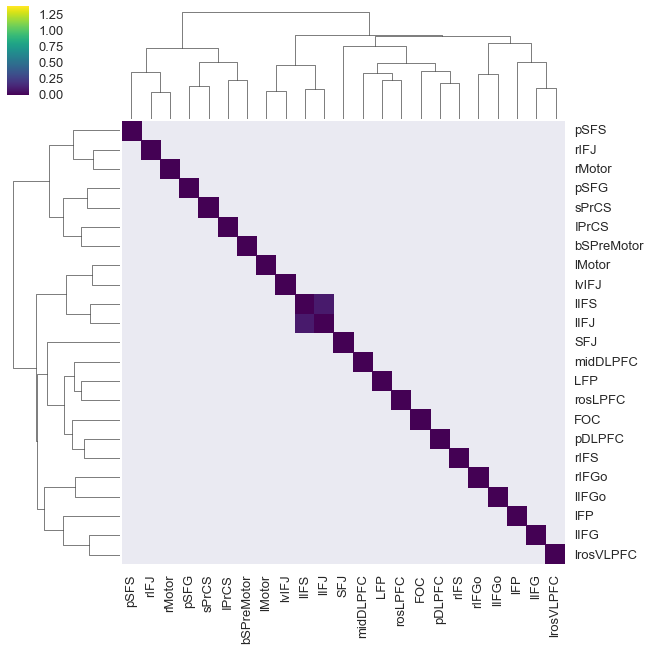

In [59]:
plt.figure(figsize=(30, 20))
g = sns.clustermap(fi_dist, cmap=plt.get_cmap('viridis'), linewidths=0, 
            square=True,  mask=fi_dist > 0.1)
for item in g.ax_heatmap.get_yticklabels():
    item.set_rotation(0)

In [60]:
fi_dist.values[fi_dist.values.nonzero()].min()

0.094328888961094148

### Coactivation maps

In [61]:
def make_thresholded_axials(init_path, regions, colors, stat="pFgA_z_FDR_0.01", overplot=True, threshold=True, **kwargs):
    import os
    from nilearn import plotting as plt
    import matplotlib.pyplot as mlplt
    
    reg_nibs = [nib.load(os.path.join(init_path, "cluster_" + str(reg) + "_" + stat + ".nii.gz")) for reg in regions]                   
                
    if threshold:
        # Threshold
        for reg in reg_nibs:
             reg.get_data()[reg.get_data().nonzero()] = 1
                                   
    for i, reg in enumerate(reg_nibs):
        reg_color = ml.colors.LinearSegmentedColormap.from_list('reg1', [colors[i], colors[i]])
        if i == 0:
            plot = plt.plot_stat_map(reg, draw_cross=False,  display_mode='z', cmap = reg_color, alpha=0.9, colorbar=False, **kwargs)
        else:
            if overplot:
                plot.add_overlay(reg, cmap = reg_color, alpha=.72)
            else:
                plt.plot_stat_map(reg, draw_cross=False,  display_mode='z', cmap = reg_color, colorbar=False, **kwargs)
    
    return plot
                      

In [62]:
def mask_level(path, level):
    img = nib.load(path)
    data = img.get_data()
    data[:] = np.round(data)
    data[data != level] = 0 
    data[data == level] = 1
    
    return img

import neurosynth.analysis.meta as meta
outdir = '../results/clustering/results/LFC/kmeans_k23/coactivation_al'
mFC_file = '../results/clustering/results/LFC/kmeans_k23/cluster_labels.nii.gz'

colors, region_set = zip(*[(core_colors[i], v) for i, (k, v) in enumerate(core_regionsAll.iteritems()) if k in coreB])

for c in region_set:
    other_ids = [dataset.get_studies(mask=mask_level(mFC_file, a), activation_threshold=0.01)
                     for a in region_set if a != c]
    joined_ids = set()
    for ids in other_ids:
        joined_ids = joined_ids | set(ids)
        
        
    reg_ids = dataset.get_studies(mask=mask_level(mFC_file, c), activation_threshold=0.03)
    ma = meta.MetaAnalysis(dataset, reg_ids, ids2=list(joined_ids))
    ma.save_results(outdir, 'cluster_%d' % c)

In [63]:
colors

((0.86, 0.37119999999999997, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.37119999999999997))

In [64]:
cut_coords = np.arange(-18, 60, 12)

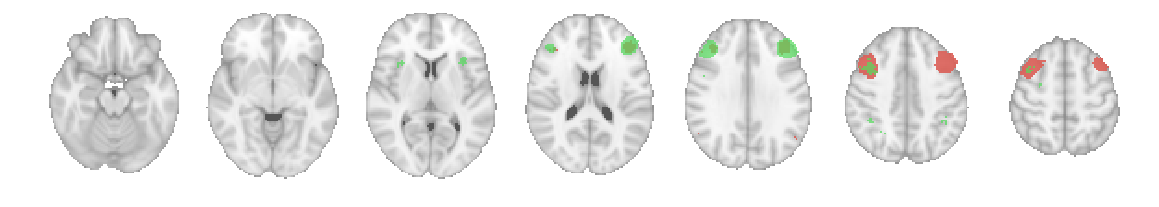

In [65]:
colors, mask = zip(*[(core_colors[i], v) for i, (k, v) in enumerate(core_regionsAll.iteritems()) if k in coreB])

make_thresholded_axials('../results/clustering/results/LFC/kmeans_k23/coactivation_al', mask, colors, 
                        annotate=False, cut_coords=cut_coords)
# mlplt.savefig('../reports/papers/mFC/3_parcels_ri_coactivation.png',bbox_inches='tight')

In [66]:
colors, mask = zip(*[(core_colors[i], v) for i, (k, v) in enumerate(core_regionsAll.iteritems()) if k in coreL])

make_thresholded_axials('../results/clustering/results/LFC/kmeans_k23/coactivation_al', mask, colors, 
                        annotate=False, cut_coords=cut_coords)
# mlplt.savefig('../reports/papers/mFC/3_parcels_ri_coactivation.png',bbox_inches='tight')

IOError: [Errno 2] No such file or directory: '../results/clustering/results/LFC/kmeans_k23/coactivation_al/cluster_1_pFgA_z_FDR_0.01.nii.gz'

In [ ]:
colors, mask = zip(*[(core_colors[i], v) for i, (k, v) in enumerate(core_regionsAll.iteritems()) if k in coreR])

make_thresholded_axials('../results/clustering/results/LFC/kmeans_k23/coactivation_al', mask, colors, 
                       annotate=False, cut_coords=cut_coords)
# mlplt.savefig('../reports/papers/mFC/3_parcels_ri_coactivation.png',bbox_inches='tight')

In [ ]:
colors, mask = zip(*[(core_colors[i], v) for i, (k, v) in enumerate(core_regionsAll.iteritems()) if k in coreB])

make_thresholded_axials('../results/clustering/results/LFC/kmeans_k23/coactivation', mask, colors, 
                        annotate=False, cut_coords=cut_coords)
# mlplt.savefig('../reports/papers/mFC/3_parcels_ri_coactivation.png',bbox_inches='tight')

In [ ]:
colors, mask = zip(*[(core_colors[i], v) for i, (k, v) in enumerate(core_regionsAll.iteritems()) if k in coreL])

make_thresholded_axials('../results/clustering/results/LFC/kmeans_k23/coactivation', mask, colors, 
                        annotate=False, cut_coords=cut_coords)
# mlplt.savefig('../reports/papers/mFC/3_parcels_ri_coactivation.png',bbox_inches='tight')

In [ ]:
colors, mask = zip(*[(core_colors[i], v) for i, (k, v) in enumerate(core_regionsAll.iteritems()) if k in coreR])

make_thresholded_axials('../results/clustering/results/LFC/kmeans_k23/coactivation', mask, colors, 
                       annotate=False, cut_coords=cut_coords)
# mlplt.savefig('../reports/papers/mFC/3_parcels_ri_coactivation.png',bbox_inches='tight')

### Pairwise permutation test

In [97]:
from __future__ import division

In [98]:
from base import tools 
boot_n = 100

from multiprocessing import Pool
pool = Pool(processes=1)
import itertools
pool = itertools

from sklearn.linear_model import RidgeClassifier

def permutation_parallel(args):
    (X, y, cla, feat_names, region), i = args
    
    newY = np.random.permutation(y)
    cla_fits = cla.fit(X, newY)
    fit_w = cla_fits.coef_[0]
    
    results = []
    for n, lo in enumerate(fit_w):
        results.append([region + 1, i, feat_names[n], lo])
        
    return results

boot_n = 10
pb = tools.ProgressBar(boot_n * len(clf.data), start=True)

In [99]:
overall_results = []
for reg, (X, y) in enumerate(clf.data):
    for result in pool.imap(permutation_parallel, itertools.izip(
            itertools.repeat((X, y, RidgeClassifier(), clf.feature_names, reg)), range(boot_n))):
        for res in result:
            overall_results.append(res)
        pb.next()
        
overall_results = pd.DataFrame(overall_results, columns=['region', 'perm_n', 'topic_name', 'fi'])

[##########] 100%


In [100]:
overall_results = overall_results.sort_values(['region', 'topic_name', 'perm_n'])

In [101]:
perm_substraction = []
for reg_a, reg_b in itertools.combinations(overall_results.region.unique(), 2):
    subset_a = overall_results[overall_results.region == reg_a]
    subset_b = overall_results[overall_results.region == reg_b]
    
    diff = subset_a.fi.values - subset_b.fi.values
    topics = subset_a.topic_name
    perm_n = subset_a.perm_n
    
    for i, v in enumerate(diff):
        perm_substraction.append([reg_a, reg_b, topics.values[i], perm_n.values[i], v])

In [102]:
perm_substraction = pd.DataFrame(perm_substraction, columns=['region_a', 'region_b', 'topic', 'perm_n', 'perm_diff'])

In [103]:
plot_clf_polar(o_fis_melt, mask=['sPrCS', 'lIFGo'], labels=all_labels, max_val=0.14, legend=True)

NameError: name 'plot_clf_polar' is not defined

In [ ]:
plot_clf_polar(o_fis_melt, mask=['lIFJ', 'lIFS'], labels=all_labels, max_val=0.14, legend=True)

In [113]:
def calc_p(val, null_dist):
    return ((null_dist >= np.abs(val)).sum() + (null_dist <= -np.abs(val)).sum()) / null_dist.shape[0]
calc_p = np.vectorize(calc_p, excluded=['null_dist'])

def p_val_pair(o_fis_melt, region_a, region_b):
    diffs = o_fis_melt[o_fis_melt.region_name == region_a].importance.values - o_fis_melt[o_fis_melt.region_name == region_b].importance.values
    return pd.DataFrame({'region_a' : region_a, 'region_b' : region_b, 'diffs' : diffs, 'p' : np.round(calc_p(val=diffs, null_dist=perm_substraction.perm_diff), 10), 'topic_name' : perm_substraction.topic.unique()})

In [114]:
all_pvalues = []
combinations = list(itertools.combinations(o_fis_melt.region_name.unique(), 2))
pb = tools.ProgressBar(len(combinations), start=True)
for region_a, region_b in combinations:
    all_pvalues.append(p_val_pair(o_fis_melt, region_a, region_b))
    pb.next()

[##########] 100%


In [120]:
all_pvalues = pd.concat(all_pvalues)
all_pvalues = pd.merge(all_pvalues, word_keys)

In [121]:
all_pvalues[(all_pvalues.region_b == 'lIFJ') & (all_pvalues.region_a == 'lIFS')].sort_values('p')

,diffs,p,region_a,region_b,topic_name,topic,cognitive,nickname,words
5715,0.057524,0.000000,lIFS,lIFJ,topic48,48,T,LTM,memory encoding retrieval recognition episodic...
2679,0.044983,0.000335,lIFS,lIFJ,topic27,27,T,language,sentences comprehension sentence language synt...
5209,0.031660,0.011486,lIFS,lIFJ,topic40,40,T,semantic,semantic words word lexical knowledge conceptu...
1161,-0.028881,0.021236,lIFS,lIFJ,topic15,15,T,motor,motor movement movements sensorimotor primary ...
2426,-0.024199,0.052473,lIFS,lIFJ,topic26,26,T,math,arithmetic numerical mental magnitude calculat...
2932,-0.018108,0.142640,lIFS,lIFJ,topic29,29,T,reward,reward anticipation monetary responses rewards...
1667,-0.017646,0.153575,lIFS,lIFJ,topic2,2,T,gaze,eye gaze movements eyes visual saccades saccad...
6727,-0.017187,0.164690,lIFS,lIFJ,topic53,53,T,gustation,food taste body weight eating women obese nerv...
4450,-0.016229,0.189268,lIFS,lIFJ,topic38,38,T,reading,reading word words phonological chinese visual...
1414,-0.015968,0.196874,lIFS,lIFJ,topic19,19,T,attention,attention attentional visual spatial target se...


In [118]:
pd.merge(all_pvalues, word_keys).sort_values('p')

,diffs,p,region_a,region_b,topic_name,topic,cognitive,nickname,words
4535,-0.062317,0.000000,rIFGo,lrosVLPFC,topic38,38,T,reading,reading word words phonological chinese visual...
1333,-0.070395,0.000000,pDLPFC,sPrCS,topic19,19,T,attention,attention attentional visual spatial target se...
4507,0.082703,0.000000,lvIFJ,lFP,topic38,38,T,reading,reading word words phonological chinese visual...
4508,0.082146,0.000000,lvIFJ,rMotor,topic38,38,T,reading,reading word words phonological chinese visual...
4513,0.064694,0.000000,FOC,rosLPFC,topic38,38,T,reading,reading word words phonological chinese visual...
4522,-0.069014,0.000000,pSFS,lrosVLPFC,topic38,38,T,reading,reading word words phonological chinese visual...
4523,-0.056710,0.000000,pSFS,lIFGo,topic38,38,T,reading,reading word words phonological chinese visual...
1314,-0.071751,0.000000,pSFG,sPrCS,topic19,19,T,attention,attention attentional visual spatial target se...
4539,0.064248,0.000000,rIFJ,rosLPFC,topic38,38,T,reading,reading word words phonological chinese visual...
4504,0.123611,0.000000,lvIFJ,rosLPFC,topic38,38,T,reading,reading word words phonological chinese visual...


### Bootstrapping of parameter estimates

In [69]:
def bootstrap_parallel(args):
    (X, y, cla, feat_names, region), i = args
    
    ## Split into classes
    X0 = X[y == 0]
    X1 = X[y == 1]

    ## Sample with replacement from each class
    X0_boot = X0[np.random.choice(X0.shape[0], X0.shape[0])]
    X1_boot = X1[np.random.choice(X1.shape[0], X1.shape[0])]

    # Recombine
    X_boot = np.vstack([X0_boot, X1_boot])
    
    cla_fits = cla.fit(X_boot, y)
    fit_w = cla_fits.coef_[0]
    
    results = []
    for n, lo in enumerate(fit_w):
        results.append([region + 1, i, feat_names[n], lo])
        
    return results

boot_n = 1000
pb = tools.ProgressBar(boot_n * len(clf.data), start=True)

In [70]:
pool = Pool(processes=7)

overall_boot = []
for reg, (X, y) in enumerate(clf.data):
    for result in pool.imap(bootstrap_parallel, itertools.izip(
            itertools.repeat((X, y, RidgeClassifier(), clf.feature_names, reg)), range(boot_n))):
        for res in result:
            overall_boot.append(res)
        pb.next()
        
overall_boot = pd.DataFrame(overall_boot, columns=['region', 'perm_n', 'topic_name', 'fi'])

[##########] 100%


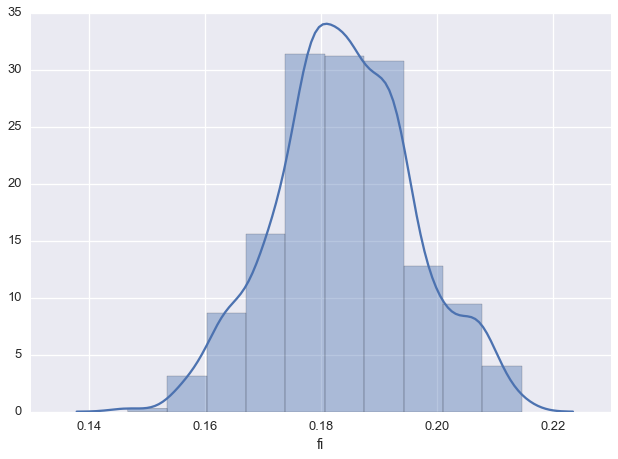

In [71]:
sns.distplot(overall_boot[(overall_boot.region == 3) & (overall_boot.topic_name == 'topic15')].fi, bins=10)

In [72]:
def percentile(n):
    def percentile_(x):
        return np.percentile(x, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [73]:
boot_ci = overall_boot.groupby(['region', 'topic_name'])['fi'].agg({'mean' : np.mean, 'low_ci' : percentile(2.5), 'hi_ci' : percentile(97.5)}).reset_index()

In [74]:
boot_ci['region_name'] =  boot_ci.region.map({v: k for k, v in regions.items()})

In [75]:
regions

OrderedDict([('lIFG', 1), ('lMotor', 2), ('pSFG', 3), ('pDLPFC', 4), ('rIFS', 5), ('SFJ', 6), ('LFP', 7), ('IPrCS', 8), ('lIFS', 9), ('sPrCS', 10), ('lIFJ', 11), ('bSPreMotor', 12), ('lvIFJ', 13), ('FOC', 14), ('pSFS', 15), ('midDLPFC', 16), ('rIFGo', 17), ('rIFJ', 18), ('rosLPFC', 19), ('lrosVLPFC', 20), ('lIFGo', 21), ('lFP', 22), ('rMotor', 23)])

In [76]:
boot_ci[(boot_ci.topic_name == 'topic26') & (boot_ci.region_name == 'lIFS')]

,region,topic_name,hi_ci,low_ci,mean,region_name
273,9,topic26,0.044553,0.002226,0.024463,lIFS


In [77]:
boot_ci[(boot_ci.topic_name == 'topic26') & (boot_ci.region_name == 'lIFJ')]

,region,topic_name,hi_ci,low_ci,mean,region_name
339,11,topic26,0.070563,0.026917,0.049332,lIFJ


In [78]:
boot_ci[(boot_ci.topic_name == 'topic15') & (boot_ci.region_name == 'lIFS')]

,region,topic_name,hi_ci,low_ci,mean,region_name
268,9,topic15,-0.007957,-0.034195,-0.022048,lIFS


In [79]:
boot_ci[(boot_ci.topic_name == 'topic15') & (boot_ci.region_name == 'lIFJ')]

,region,topic_name,hi_ci,low_ci,mean,region_name
334,11,topic15,0.022273,-0.006893,0.007681,lIFJ


###Polar plot with CI estimates

In [80]:
plot_clf_polar(o_fis_melt, mask=['sPrCS', 'lIFGo', 'lFP'], labels=all_labels, max_val=0.14, legend=True)

NameError: name 'plot_clf_polar' is not defined

In [81]:
def plot_clf_polar_ci(o_fis_melt, cmap=None, mask=None, key='nickname', region_col='region_name', error_bars=None, **kwargs):
    import pandas as pd
    import seaborn as sns
#     import base.plotting
    
    if mask is not None:
        o_fis_melt = o_fis_melt[o_fis_melt[region_col].isin(mask)]
    
    pplot = pd.pivot_table(o_fis_melt, values='mean', index=[key], columns=[region_col])
    
    if cmap is None:
        cmap = sns.color_palette('Set1', clf.feature_importances.shape[0])
        
    if error_bars is not None:
        fis_ci['yerror'] = np.mean([np.abs(fis_ci['mean'] - fis_ci['hi_ci']), np.abs(fis_ci['mean'] - fis_ci['low_ci'])])
        error_bars = pd.pivot_table(o_fis_melt, values='yerror', index=[key], columns=[region_col])

    return base.plotting.plot_polar(pplot, overplot=True, palette=cmap, error_bars=error_bars, **kwargs)

In [84]:
    word_keys = pd.read_csv("../data/unprocessed/abstract_topics_filtered/topic_sets/topic_keys" + str(n_topics) + "-july_cognitive.csv")
    word_keys['topic_name'] = "topic" + word_keys['topic'].astype('str')

In [85]:
fis_ci = pd.merge(boot_ci, word_keys)

In [96]:
fis_ci

,region,topic_name,hi_ci,low_ci,mean,region_name,topic,cognitive,nickname,words,yerror
0,1,topic1,-0.000319,-0.024740,-0.012055,lIFG,1,T,stress,stress awareness experience conscious cortisol...,0.016975
1,2,topic1,0.003000,-0.022495,-0.009438,lMotor,1,T,stress,stress awareness experience conscious cortisol...,0.016975
2,3,topic1,0.021995,-0.006317,0.007026,pSFG,1,T,stress,stress awareness experience conscious cortisol...,0.016975
3,4,topic1,0.020037,-0.015344,0.001340,pDLPFC,1,T,stress,stress awareness experience conscious cortisol...,0.016975
4,5,topic1,-0.000786,-0.027818,-0.014744,rIFS,1,T,stress,stress awareness experience conscious cortisol...,0.016975
5,6,topic1,0.002609,-0.024907,-0.012524,SFJ,1,T,stress,stress awareness experience conscious cortisol...,0.016975
6,7,topic1,0.025072,-0.011361,0.006758,LFP,1,T,stress,stress awareness experience conscious cortisol...,0.016975
7,8,topic1,0.012902,-0.014039,-0.001950,IPrCS,1,T,stress,stress awareness experience conscious cortisol...,0.016975
8,9,topic1,-0.006780,-0.030309,-0.018741,lIFS,1,T,stress,stress awareness experience conscious cortisol...,0.016975
9,10,topic1,0.018275,-0.015564,0.000129,sPrCS,1,T,stress,stress awareness experience conscious cortisol...,0.016975


base/plotting.py:48: FutureWarning: order is deprecated, use sort_values(...)
  labels.extend(data.iloc[:, i].order(ascending=False) \


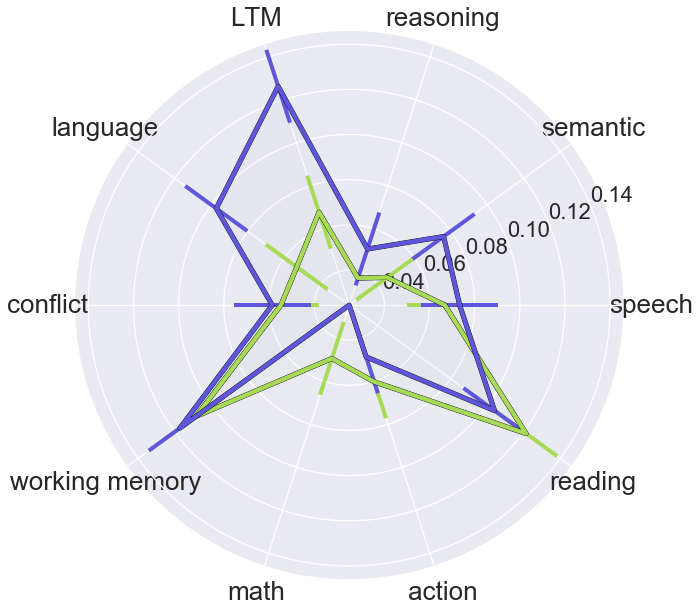

In [126]:
colors, mask = zip(*[(core_colors[i], v) for i, (k, v) in enumerate(core_regionsAll.iteritems()) if k in ['lIFJ', 'lIFS']])
plot_clf_polar_ci(fis_ci, error_bars=True, mask=['lIFJ', 'lIFS'], cmap=colors, n_top=8)

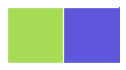

In [94]:
sns.palplot(colors)